In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#pipeline
from sklearn.pipeline import Pipeline 
#model_selection
from sklearn.model_selection import train_test_split
#feature selection
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
#preprocessing
from sklearn.preprocessing import StandardScaler
#transformer
from sklearn.compose import ColumnTransformer
#confusion matrix
import sklearn.metrics as m
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from joblib import load, dump
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [3]:
url = 'dataset/data.csv'
data = pd.read_csv(url)
data


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

# Creating Pipeline

In [8]:
corrs = data.corrwith(data['Bankrupt?'], method='pearson')
corrs

Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Operating Gross Margin                                    -0.100043
                                                              ...   
 Liability to Equity                                        0.166812
 Degree of Financial Leverage (DFL)                         0.010508
 Interest Coverage Ratio (Interest expense to EBIT)        -0.005509
 Net Income Flag                                                 NaN
 Equity to Liability                                       -0.083048
Length: 96, dtype: float64

In [9]:
selected_col = corrs[(corrs>.2) | (corrs <-.2)].index.tolist()[1:]
selected_col

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Net profit before tax/Paid-in capital',
 ' Retained Earnings to Total Assets',
 ' Net Income to Total Assets']

In [10]:
X = data[selected_col]
y = data['Bankrupt?']
rfe = RFE(RandomForestClassifier(), n_features_to_select=5)
rfe.fit(X, y)
rfe.get_support()


array([False, False, False,  True,  True,  True,  True,  True, False,
       False])

In [11]:

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('feature_selection',rfe),
    ('random_forest_classifier', RandomForestClassifier(random_state=42))
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=5)),
                ('random_forest_classifier',
                 RandomForestClassifier(random_state=42))])

In [12]:
X.shape, y.shape

((6819, 10), (6819,))

In [13]:
X_train, Xtest, y_train , ytest = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train,y_train) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=5)),
                ('random_forest_classifier',
                 RandomForestClassifier(random_state=42))])

In [14]:
ypred = pipeline.predict(Xtest)
cm = m.confusion_matrix(ytest, ypred)
report = m.classification_report(ytest, ypred)

<Axes: >

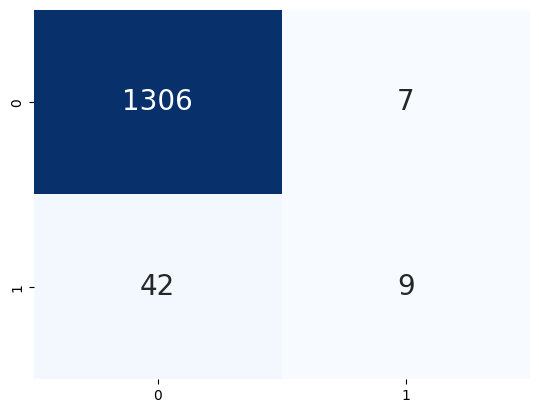

In [15]:
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 20}, fmt='g')

In [16]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
X_smote.shape, y_smote.shape

((13198, 10), (13198,))

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
model = pipeline.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1334
           1       0.92      0.97      0.95      1306

    accuracy                           0.95      2640
   macro avg       0.95      0.95      0.95      2640
weighted avg       0.95      0.95      0.95      2640



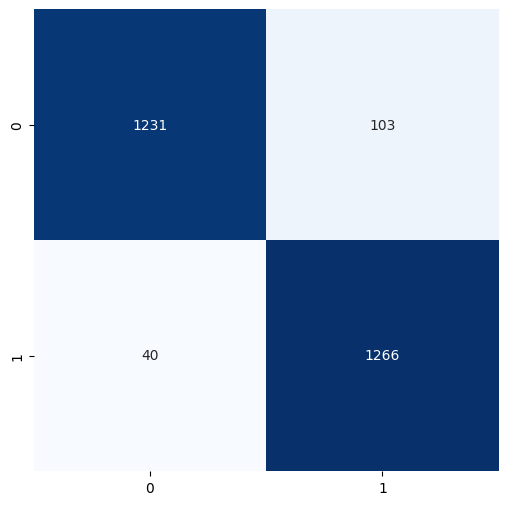

In [18]:
cf = m.confusion_matrix(ytest, ypred)
fig, ax = plt.subplots(figsize=(6,6))
_ = sns.heatmap(cf, annot=True, cmap='Blues', cbar=False, ax=ax, fmt='g')
print(m.classification_report(ytest, ypred))

In [19]:
data1 = pd.DataFrame([[2,3,0.2,0.2,0.2,2,5,4,1,0.7]], columns=selected_col)

In [24]:
result = model.predict(data1)
result

array([0], dtype=int64)

In [25]:
dump(model,'company_bankcruptcy_prediction.joblib')

['company_bankcruptcy_prediction.joblib']

In [29]:
data_model = load('company_bankcruptcy_prediction.joblib')
result = (data_model.score(Xtest, ytest)) 
result

0.9458333333333333